Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

1.Importing the data and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

2.Data checks
1.Check Missing values
2.Check Duplicates
3.Check data type
4.Check the number of unique values of each column
5.Check statistics of data set
6.Check various categories present in the different categorical column
7.checking which are numerical categories and which are not

In [8]:
df.isna().sum() #1

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum() #2

0

In [12]:
df.dtypes #3

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [13]:
df.nunique() #4

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
df.describe() #5

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
# 6 categories
print("categories of Gender: ", df['gender'].unique() )
print("categories of race_ethnicity: ", df['race_ethnicity'].unique() )
print("categories of parental_level_of_education: ", df['parental_level_of_education'].unique() )   
print("categories of lunch: ", df['lunch'].unique() )
print("categories of test_preparation_course: ", df['test_preparation_course'].unique() )

categories of Gender:  ['female' 'male']
categories of race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories of parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories of lunch:  ['standard' 'free/reduced']
categories of test_preparation_course:  ['none' 'completed']


In [23]:
df['gender'].dtype

dtype('O')

In [24]:
#7
numeric_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

Numeric columns:  ['math_score', 'reading_score', 'writing_score']
Categorical columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.Transforming
1.create total score col(mathsscore,reading score,writing score)
2.create avg col
3.finding out how many students scored fully marks
4.finding out how many students scored less than 20 marks


In [26]:

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
maths_full=df[df['math_score'] == 100]['Average_Score'].count()
print("Number of students who scored full marks in maths: ", maths_full)
reading_full=df[df['reading_score'] == 100]['Average_Score'].count()
print("Number of students who scored full marks in reading: ", reading_full)
writing_full=df[df['writing_score'] == 100]['Average_Score'].count()
print("Number of students who scored full marks in writing: ", writing_full)

Number of students who scored full marks in maths:  7
Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14


In [33]:
math_less=df[df['math_score'] <= 20]['Average_Score'].count()
print("Number of students who scored less than or equal to 20 in maths: ", math_less)
reading_less=df[df['reading_score'] <= 20]['Average_Score'].count()
print("Number of students who scored less than or equal to 20 in reading: ", reading_less)
writing_less=df[df['writing_score'] <= 20]['Average_Score'].count()
print("Number of students who scored less than or equal to 20 in writing: ", writing_less)


Number of students who scored less than or equal to 20 in maths:  4
Number of students who scored less than or equal to 20 in reading:  1
Number of students who scored less than or equal to 20 in writing:  3


Based on this (insights):
Worst perfomance in Maths
best in Reading

4.Exploring Data

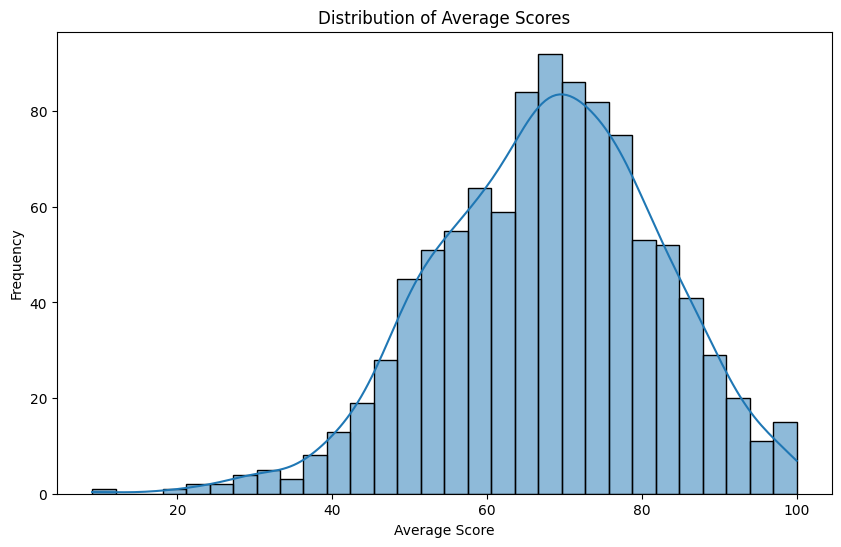

In [34]:
#1 distribution of average scores
plt.figure(figsize=(10,6))
sns.histplot(df['Average_Score'], bins=30, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

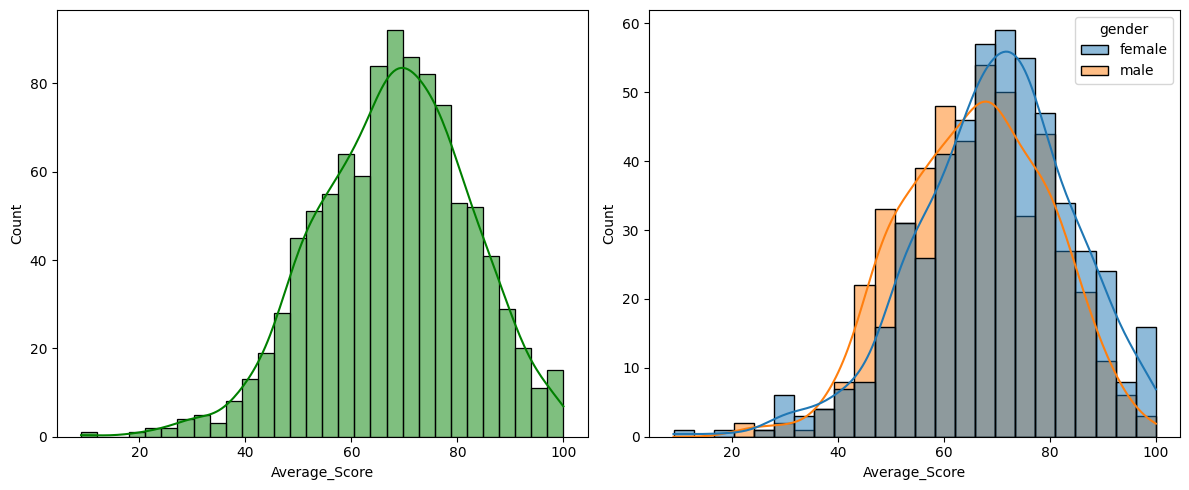

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df, x='Average_Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average_Score', kde=True, hue='gender')
plt.tight_layout()
plt.show()
#hue is a Seaborn option used to split data by a category using colors 🎨

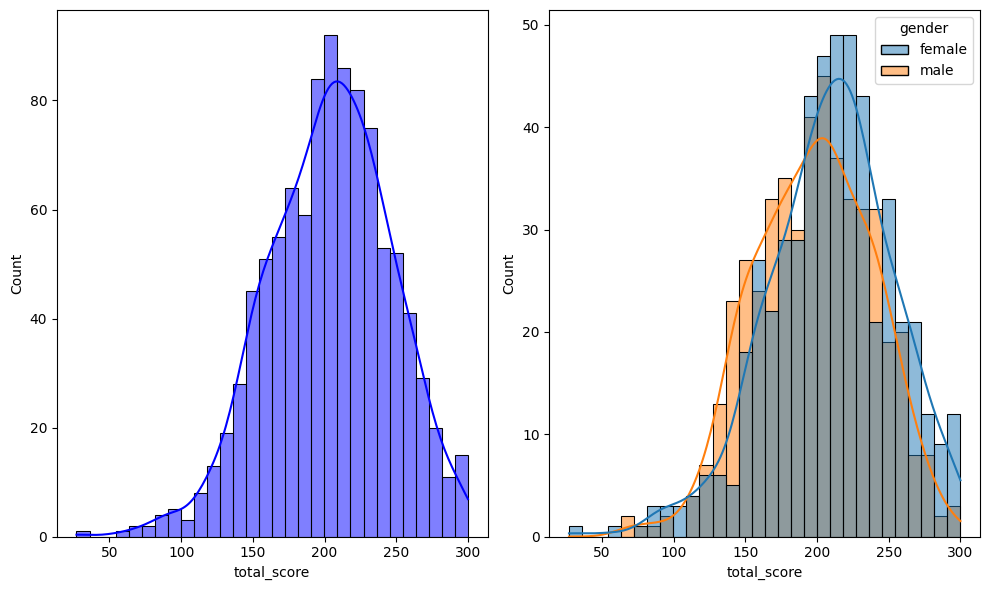

In [44]:
#2 distribution of total scores by gender
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='b')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.tight_layout()
plt.show()

Insight:
Based on the distribution :Female performs better than male

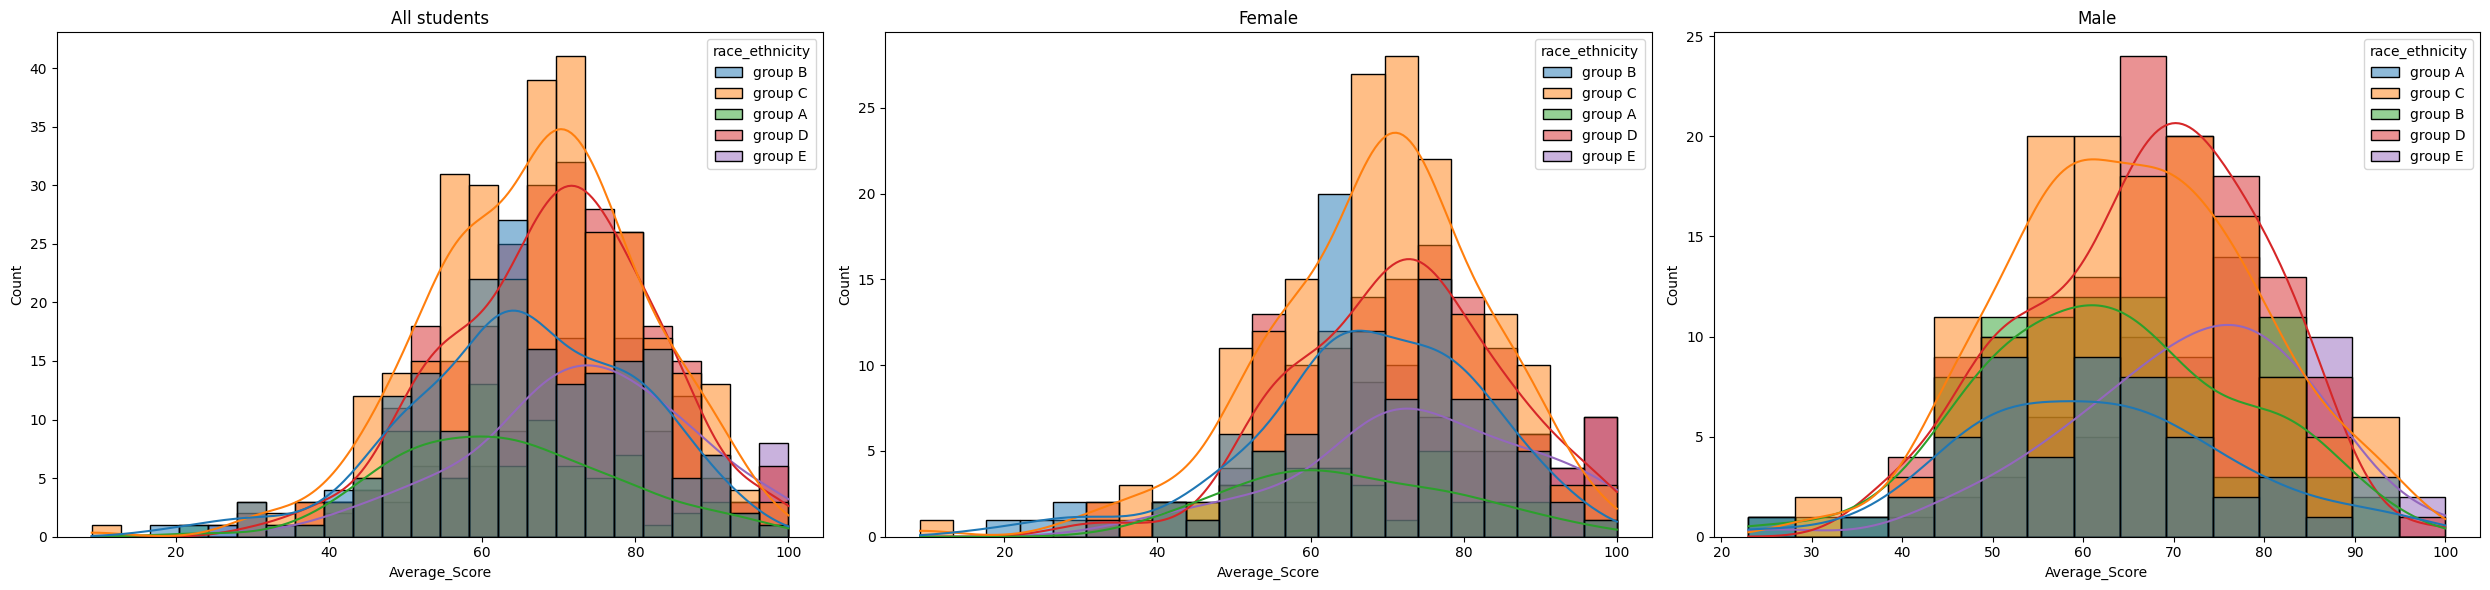

In [47]:
# distribution of race/ethnicity with respect to average scores 
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average_Score', kde=True, hue='race_ethnicity')
plt.title('All students')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='Average_Score', kde=True, hue='race_ethnicity')
plt.title('Female')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='Average_Score', kde=True, hue='race_ethnicity')
plt.title('Male')

plt.tight_layout()
plt.show()

Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

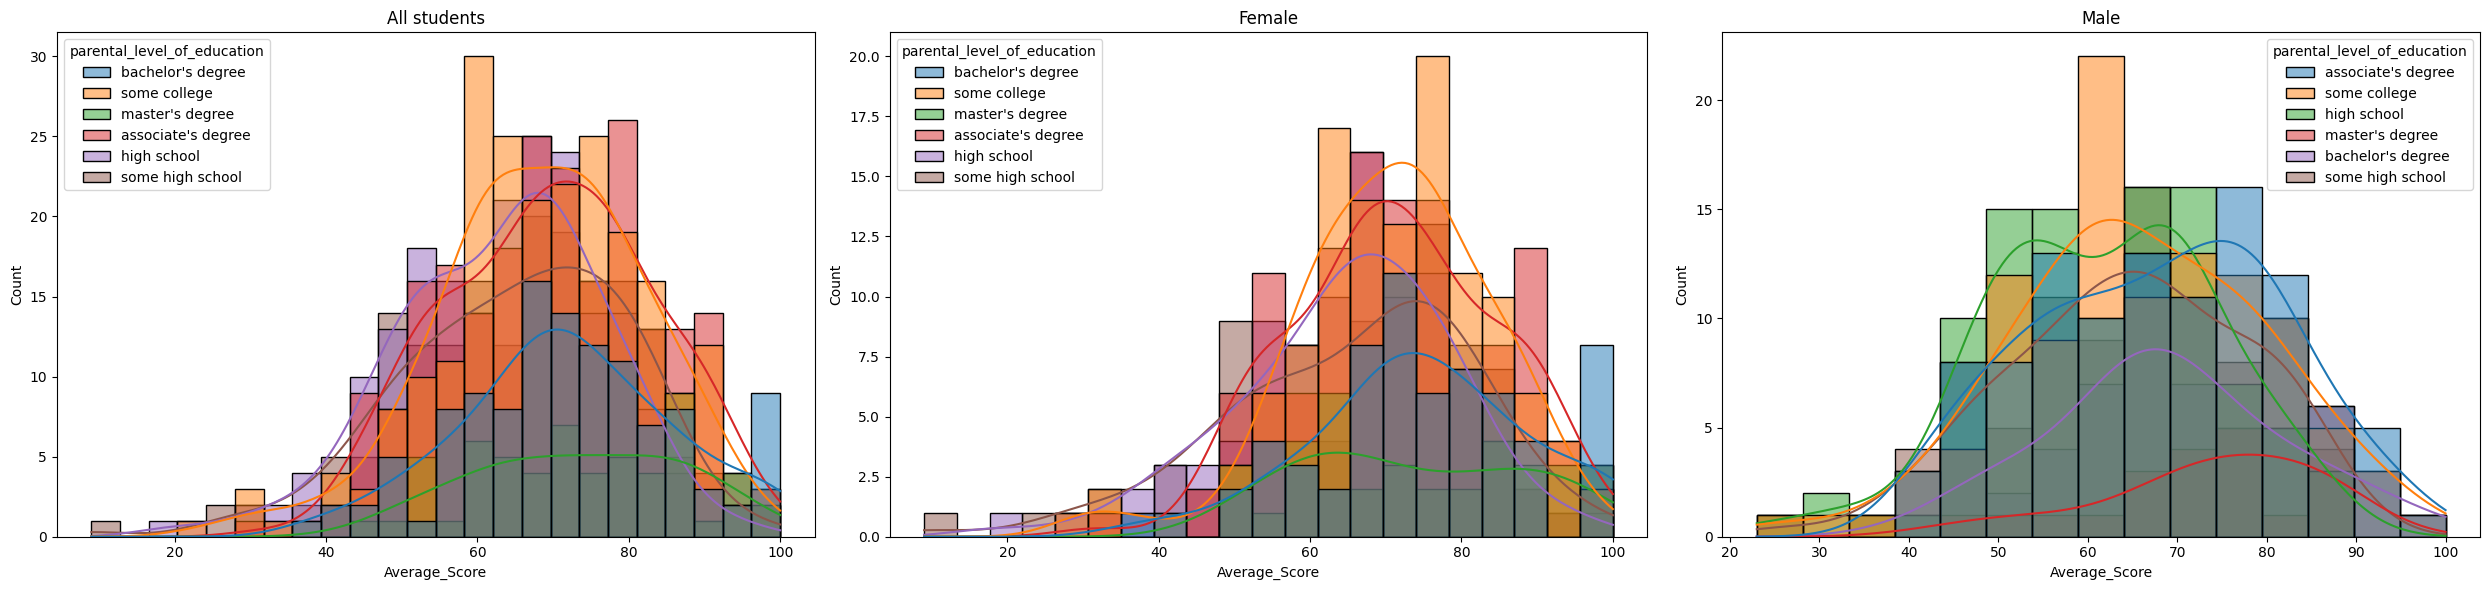

In [48]:
#distribution of parental level of education with respect to average scores
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average_Score', kde=True, hue='parental_level_of_education')
plt.title('All students')   
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='Average_Score', kde=True, hue='parental_level_of_education')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='Average_Score', kde=True, hue='parental_level_of_education')
plt.title('Male')
plt.tight_layout()
plt.show()

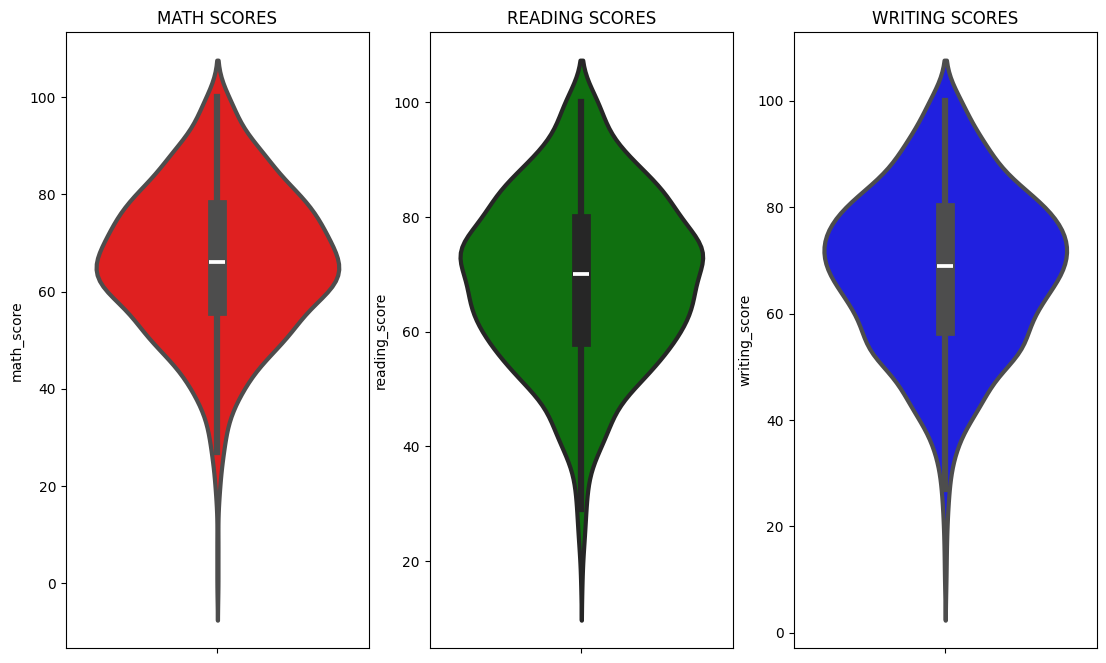

In [50]:
#maximum score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insight:
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

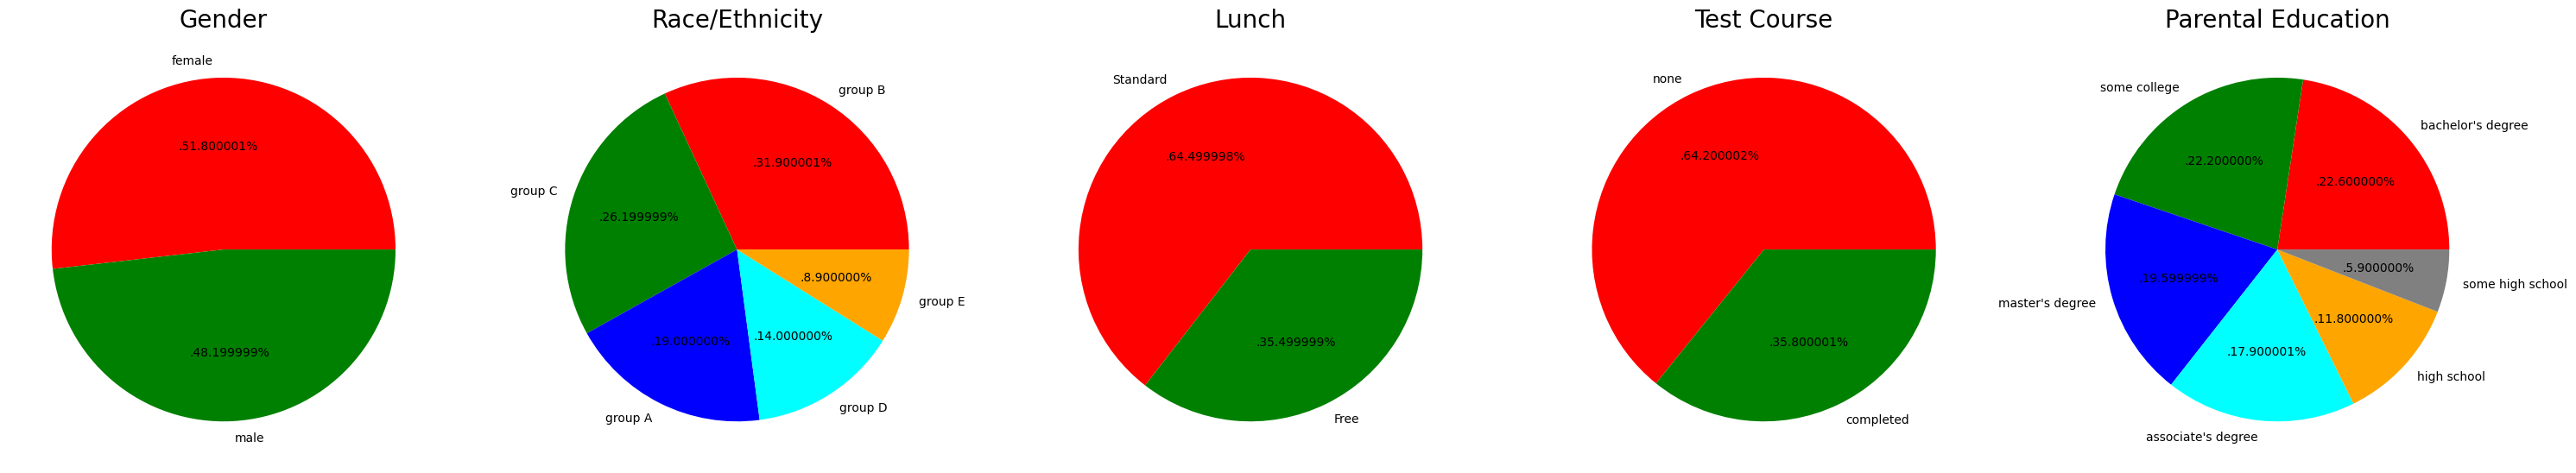

In [53]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = df['gender'].unique()
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].unique()
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"